In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from PIL import Image
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
def load_labels_1_train():
    datasets_dir = "../Datasets/celeba/"
    img_dir = "img/"
    labels_filename = "labels.csv"

    df = pd.read_csv(datasets_dir + labels_filename, sep = "\t")
    df["img_dir"] = datasets_dir + img_dir + df["img_name"]
    
    df["gender"] = df["gender"].replace(-1, 0)

    df = df[["img_dir", "gender"]]
    print(df.head())
    return df

def load_labels_1_test():
    datasets_dir = "../Datasets/celeba_test/"
    img_dir = "img/"
    labels_filename = "labels.csv"

    df = pd.read_csv(datasets_dir + labels_filename, sep = "\t")
    df["img_dir"] = datasets_dir + img_dir + df["img_name"]
    
    df["gender"] = df["gender"].replace(-1, 0)

    df = df[["img_dir", "gender"]]
    print(df.head())
    return df

In [3]:
labels_train = load_labels_1_train()

                        img_dir  gender
0  ../Datasets/celeba/img/0.jpg       0
1  ../Datasets/celeba/img/1.jpg       0
2  ../Datasets/celeba/img/2.jpg       1
3  ../Datasets/celeba/img/3.jpg       0
4  ../Datasets/celeba/img/4.jpg       0


In [4]:
labels_test = load_labels_1_test()

                             img_dir  gender
0  ../Datasets/celeba_test/img/0.jpg       0
1  ../Datasets/celeba_test/img/1.jpg       0
2  ../Datasets/celeba_test/img/2.jpg       1
3  ../Datasets/celeba_test/img/3.jpg       1
4  ../Datasets/celeba_test/img/4.jpg       0


In [5]:
gender_dict = {1:'Male', 0:'Female'}

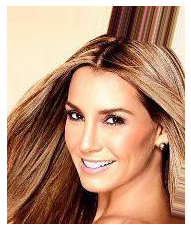

In [6]:
img = Image.open(labels_train['img_dir'][0])
plt.axis('off')
plt.imshow(img);

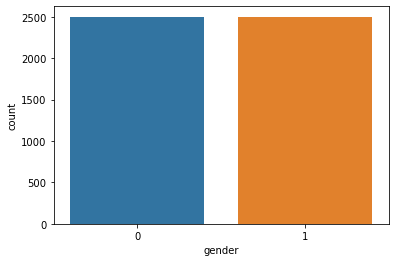

In [7]:
sns.countplot(labels_train['gender']);

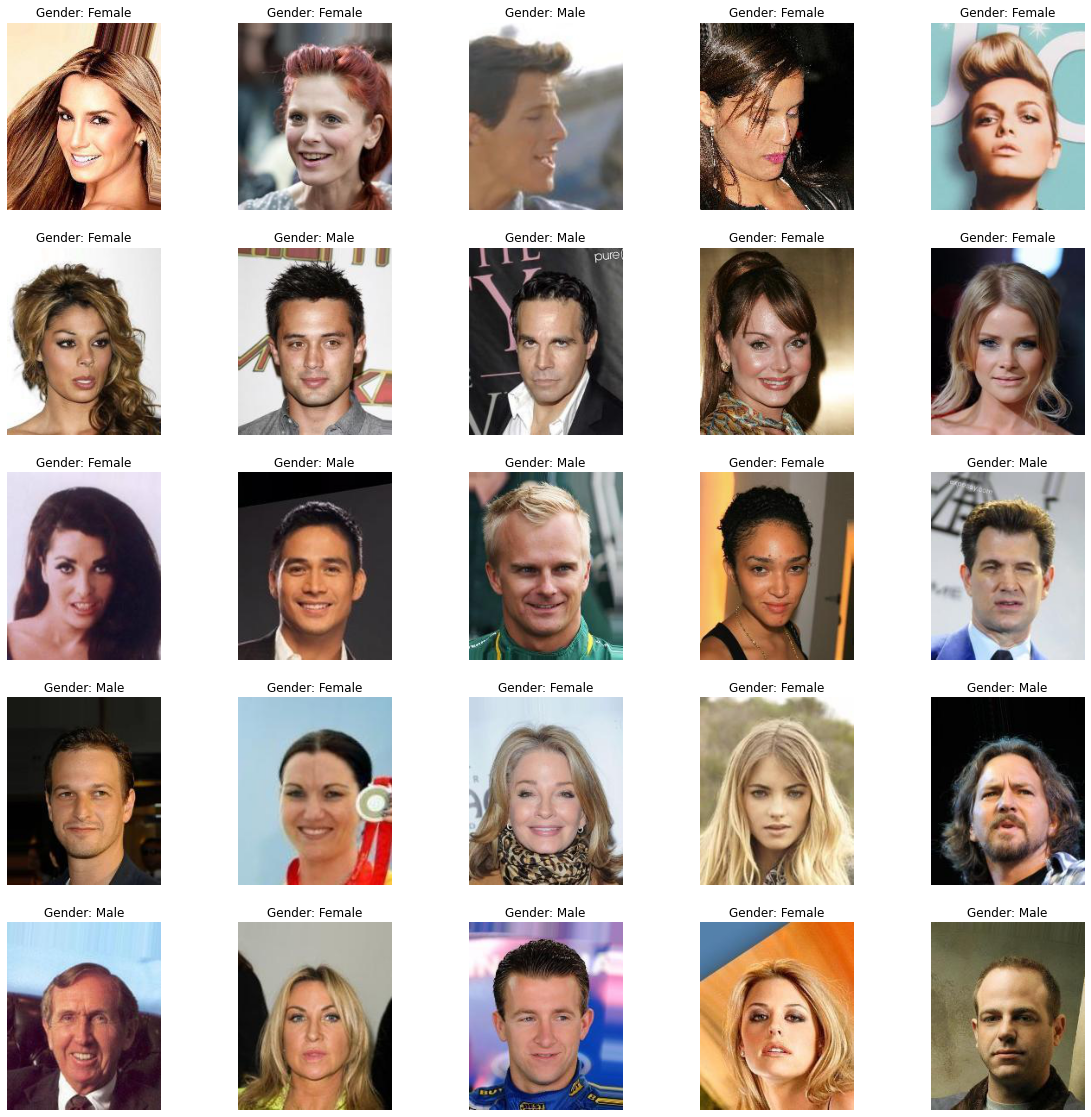

In [8]:
plt.figure(figsize=(20, 20))
files = labels_train.iloc[0:25]

for index, file, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {gender_dict[gender]}")
    plt.axis('off')

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((128, 128), Image.LANCZOS)
        # img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    # features = features.reshape(len(features), 128, 128, 3)
    return features

In [10]:
x_train = extract_features(labels_train['img_dir'])

  0%|          | 0/5000 [00:00<?, ?it/s]

In [11]:
x_train.shape

(5000, 128, 128, 3)

In [12]:
x_train = x_train/255.0

In [13]:
y_train = np.array(labels_train['gender'])

In [14]:
input_shape = (128, 128, 3)

In [18]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)

flatten = Flatten() (maxp_3)

# fully connected layers
dense = Dense(256, activation='relu') (flatten)

dropout = Dropout(0.3) (dense)

outputs = Dense(1, activation='sigmoid', name='gender_out') (dropout)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])

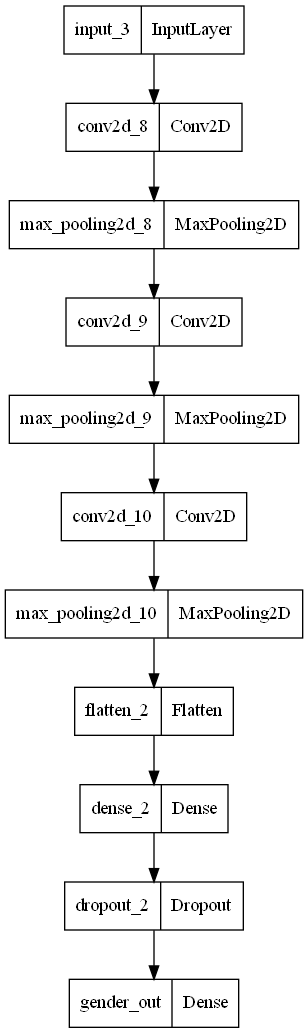

In [19]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [21]:
history = model.fit(x=x_train, y=y_train, batch_size=50, epochs=20, validation_split=0.2)

Epoch 1/20
80/80 [==============================] - 86s 1s/step - loss: 0.5650 - accuracy: 0.7053 - val_loss: 0.6470 - val_accuracy: 0.6740
Epoch 2/20
80/80 [==============================] - 81s 1s/step - loss: 0.3287 - accuracy: 0.8620 - val_loss: 0.1794 - val_accuracy: 0.9320
Epoch 3/20
80/80 [==============================] - 69s 861ms/step - loss: 0.2083 - accuracy: 0.9162 - val_loss: 0.2324 - val_accuracy: 0.9080
Epoch 4/20
80/80 [==============================] - 67s 840ms/step - loss: 0.1449 - accuracy: 0.9423 - val_loss: 0.2210 - val_accuracy: 0.9060
Epoch 5/20
80/80 [==============================] - 67s 841ms/step - loss: 0.1042 - accuracy: 0.9582 - val_loss: 0.1474 - val_accuracy: 0.9470
Epoch 6/20
80/80 [==============================] - 69s 863ms/step - loss: 0.0672 - accuracy: 0.9740 - val_loss: 0.2338 - val_accuracy: 0.9110
Epoch 7/20
80/80 [==============================] - 78s 972ms/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.1961 - val_accuracy: 0.9300
Epoch

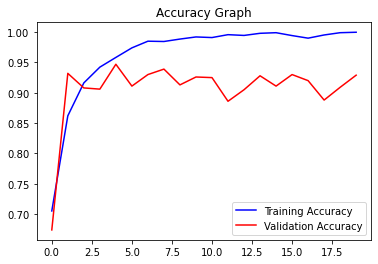

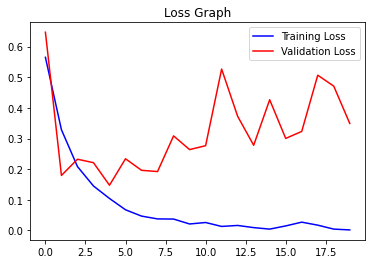

In [24]:
# plot results for gender
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [25]:
x_test = extract_features(labels_test["img_dir"])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
x_test = x_test/255.0

Original Gender: Female
1/1 [==============================] - 2s 2s/step
Predicted Gender: Female


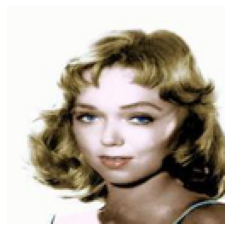

In [30]:
img_index = 0
print("Original Gender:", gender_dict[y_test[img_index]])
# predict from model
pred = model.predict(x_test[img_index].reshape(1, 128, 128, 3))
pred_gender = gender_dict[round(pred[0][0])]
print("Predicted Gender:", pred_gender)
plt.axis('off')
plt.imshow(x_test[img_index].reshape(128, 128, 3), cmap='gray');

In [ ]:
y_test = np.array(labels_test['gender'])

In [29]:
results = model.evaluate(x = x_test, y = y_test, batch_size=100)

10/10 [==============================] - 4s 370ms/step - loss: 87.4695 - accuracy: 0.9230
